1. This code block opens the mnist training file and enters the images into a matrix. The mnist_train_small.csv is a collection of handwritten digits. Then I demean the data and perform a singular value decomposition on the data. For this program, I am using only the first 100 principal components. I then create a matrix containing all of the weights of the images in each of the 100 principal components.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from ast import Num
from ipywidgets import interact


from ast import Num
file = "sample_data/mnist_train_small.csv"
with open(file, 'r') as f:
  reader = csv.reader(f,delimiter=',')
  raw_data = np.array(list(reader)).astype(np.float)
X = raw_data[:,1:]
num_vec = raw_data[:,0].astype(np.int)


sum = X[0,:]
for i in range(1,X.shape[0]):
  sum = sum+X[i,:]
avg = sum/X.shape[0]
for i in range (0,X.shape[0]):
  X[i,:] = X[i,:] - avg

U, S, Vt = np.linalg.svd(X)

V = Vt.T

V = np.delete(V, np.s_[100:],1)

img0 = X[0,:].reshape(X.shape[1],1)
num_vec = num_vec.reshape(X.shape[0],)

numvec = V.T@X[0,:].reshape(X.shape[1],1)

for i in range(1, X.shape[1]):
  temp = V.T@X[i,:].reshape(X.shape[1],1)
  numvec = np.append(numvec, temp, axis = 1)

proj = X@V








2. This code block opens a testing set of images with different handwritten digits and puts them into a matrix. I then perform a singular value decomposition on the data and find the weights of the testing data in each of the principal components.

In [6]:
from enum import EnumMeta
from ast import Num
file = "sample_data/mnist_test.csv"
with open(file, 'r') as f:
  reader = csv.reader(f,delimiter=',')
  raw_data = np.array(list(reader)).astype(np.float)
Y = raw_data[:,1:]
numbers = raw_data[:,0].astype(np.int)
numbers = num_vec.reshape(X.shape[0],)

sum = Y[0,:]
for i in range(1,Y.shape[0]):
  sum = sum+Y[i,:]
avg = sum/Y.shape[0]
for i in range (0,Y.shape[0]):
  Y[i,:] = Y[i,:] - avg


U,S,E = np.linalg.svd(Y)
E=E.T
E = np.delete(V, np.s_[100:],1)

enums = Y@E

 

3. Allows the user to choose an image from the testing database for the computer to analyze.

Which image would you like to test (0-9999)?: 200


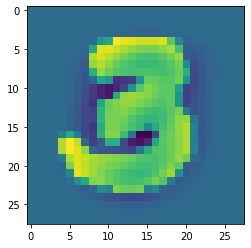

In [16]:
y = input("Which image would you like to test (0-9999)?: ")
plt.imshow(Y[int(y),:].reshape(28,28))


4. Runs through the training data set to find the image with the most similar principal component weights. It then retrieves the number from the training dataset.

In [17]:
img = enums[int(y),:]

best = np.zeros(100)

pc=-1

for i in range(0,proj.shape[0]):
  c = proj[i,:]
  if np.linalg.norm(best-img) > np.linalg.norm(c-img):
    best = c
    pc=num_vec[i]

print(pc)
  

3
